In [1]:
import geopandas
import geodatasets

In [2]:
# nyc_trees = geopandas.read_file("data/2015 Street Tree Census - Tree Data.geojson")
# note: you need to install pyarrow for this to work
nyc_trees = geopandas.read_parquet("data/nyc_trees.parquet")

In [3]:
#import sys 
#!{sys.executable} -m pip install pyarrow

In [4]:
# to_parquet is not supported in production yet.
# using parquet reduces the read of the file to < 1 min.
# without using parquet, read_file() takes ~6 min
# nyc_trees.to_parquet('data/nyc_trees.parquet')

In [5]:
# TODO: Split up nyc_trees into bk_trees, mh_trees, queens_trees, si_trees, bronx_trees

In [6]:
nyc_trees.head()

,nta,health,zipcode,latitude,nta_name,state,trnk_wire,y_sp,brnch_othe,root_grate,...,address,sidewalk,root_other,created_at,borocode,block_id,trnk_light,tree_dbh,root_stone,geometry
0,QN17,Fair,11375,40.72309177,Forest Hills,New York,No,202756.768749,No,No,...,108-005 70 AVENUE,NoDamage,No,08/27/2015,4,348711,No,3,No,POINT (-73.84422 40.72309)
1,QN49,Fair,11357,40.79411067,Whitestone,New York,No,228644.837379,No,No,...,147-074 7 AVENUE,Damage,No,09/03/2015,4,315986,No,21,Yes,POINT (-73.81868 40.79411)
2,BK90,Good,11211,40.71758074,East Williamsburg,New York,No,200716.891267,No,No,...,390 MORGAN AVENUE,Damage,No,09/05/2015,3,218365,No,3,No,POINT (-73.93661 40.71758)
3,BK90,Good,11211,40.71353749,East Williamsburg,New York,No,199244.253136,No,No,...,1027 GRAND STREET,Damage,No,09/05/2015,3,217969,No,10,Yes,POINT (-73.93446 40.71354)
4,BK37,Good,11215,40.66677776,Park Slope-Gowanus,New York,No,182202.425999,No,No,...,603 6 STREET,Damage,No,08/30/2015,3,223043,No,21,Yes,POINT (-73.97598 40.66678)


In [7]:
nyc_trees.columns

Index(['nta', 'health', 'zipcode', 'latitude', 'nta_name', 'state',
       'trnk_wire', 'y_sp', 'brnch_othe', 'root_grate', 'tree_id', 'steward',
       'spc_common', 'trnk_other', 'x_sp', 'brnch_ligh', 'problems',
       'longitude', 'boro_ct', 'zip_city', 'spc_latin', 'stump_diam',
       'boroname', 'st_senate', 'user_type', 'status', 'brnch_shoe',
       'curb_loc', 'cncldist', 'guards', 'st_assem', 'cb_num', 'address',
       'sidewalk', 'root_other', 'created_at', 'borocode', 'block_id',
       'trnk_light', 'tree_dbh', 'root_stone', 'geometry'],
      dtype='object')

In [8]:
nyc_trees['borocode'].head()

0    4
1    4
2    3
3    3
4    3
Name: borocode, dtype: object

In [9]:
nyc_trees['borocode'] = nyc_trees['borocode'].astype("int64")

In [10]:
boros = geopandas.read_file(geodatasets.get_path("nybb"))
boros.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [11]:
# TODO join boros and nyc_trees on boros,BoroCode and nyc_trees,borocode

In [12]:
boros.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
nyc_trees.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# going to change the crs of boros since it is smaller
boros = boros.to_crs(nyc_trees.crs)

In [15]:
boros.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
boro_names = boros[['BoroCode', 'BoroName']]

In [17]:
boro_names = boro_names.rename(columns={'BoroCode': 'borocode'})

In [18]:
# can we use `join()` instead of merge?
nyc_trees = nyc_trees.merge(boro_names, on='borocode')

In [19]:
nyc_trees['BoroName'].head()

0    Queens
1    Queens
2    Queens
3    Queens
4    Queens
Name: BoroName, dtype: object

### Which Borough Has the Most Trees?

In [20]:
tree_count = nyc_trees.groupby(['BoroName']).sum()

In [21]:
tree_count = tree_count.rename(columns={'borocode': 'count'})

In [22]:
tree_count.sort_values(by=['count'])

,count
BoroName,
Manhattan,65423
Bronx,170406
Staten Island,526590
Brooklyn,531879
Queens,1002204


In [23]:
# get the geometries back onto tree_count
tree_count = boros.merge(tree_count, on='BoroName')

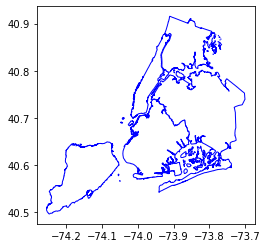

In [24]:
# TODO: display the above as a chloropleth map
base = boros.plot(color='white', edgecolor='blue')

<AxesSubplot:>

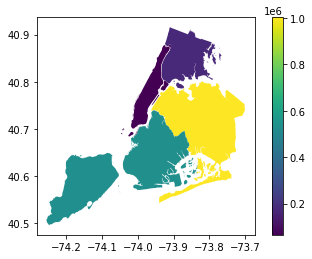

In [25]:
tree_count.plot(column="count",  legend=True)

## What is the area of each borough?

And which borough has the highest *density* of trees?

In [26]:
# we need to convert Geometry column back to a geographic CRS to be able to get areas
boros_geographic = boros.to_crs("EPSG:2263")

What units will the area be in?
- you can find out in this case from the `.name` of the `.crs` object
- in this case the name tells us the units are feet (ft)
- when we take the area, we will get feet squared (ft^2)

In [27]:
boros_geographic.crs.name

'NAD83 / New York Long Island (ftUS)'

In [28]:
boros_geographic.geometry.area

0    1.623822e+09
1    3.045214e+09
2    1.937478e+09
3    6.364712e+08
4    1.186926e+09
dtype: float64

In [29]:
# add tree count to boros_geographic
# create a new gdf with BoroName, area, count, 
# how to merge in the tree_count['count'] based on BoroName?
# boros_geographic['tree_count'] = tree_count['count']

I realized at this point, that area is already in the orignal `boros` gdf under `Shape_Area`

In [32]:
boros_w_count = boros_geographic.merge(tree_count[['BoroName', 'count']], on='BoroName')

In [33]:
boros_w_count.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,count
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",526590
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",1002204
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",531879
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",65423
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",170406


In [34]:
boros_w_count['density'] = boros_w_count['count'] / boros_w_count['Shape_Area']

In [35]:
boros_w_count['density']

0    0.000324
1    0.000329
2    0.000275
3    0.000103
4    0.000144
Name: density, dtype: float64

<AxesSubplot:>

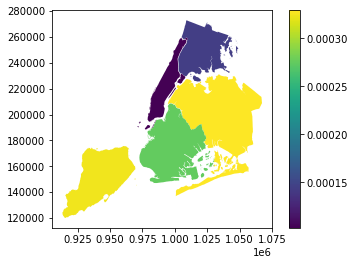

In [36]:
boros_w_count.plot('density', legend=True)

## Finding the longest lines of trees in NYC

* first add a buffer to each point so points will overlap.
* then create a new gdf of joined points -> lines. 
* try plotting the lines with the `base = boros.plot(color='white', edgecolor='blue')`
* then try to find the longest line

In [37]:
boros.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [38]:
nyc_trees.head()

,nta,health,zipcode,latitude,nta_name,state,trnk_wire,y_sp,brnch_othe,root_grate,...,sidewalk,root_other,created_at,borocode,block_id,trnk_light,tree_dbh,root_stone,geometry,BoroName
0,QN17,Fair,11375,40.72309177,Forest Hills,New York,No,202756.768749,No,No,...,NoDamage,No,08/27/2015,4,348711,No,3,No,POINT (-73.84422 40.72309),Queens
1,QN49,Fair,11357,40.79411067,Whitestone,New York,No,228644.837379,No,No,...,Damage,No,09/03/2015,4,315986,No,21,Yes,POINT (-73.81868 40.79411),Queens
2,QN72,Good,11105,40.78242823,Steinway,New York,No,224349.036588,No,No,...,NoDamage,No,09/05/2015,4,302371,No,11,No,POINT (-73.91117 40.78243),Queens
3,QN72,Poor,11105,40.78173511,Steinway,New York,No,224096.27397,No,No,...,NoDamage,No,09/05/2015,4,302371,No,8,No,POINT (-73.91202 40.78174),Queens
4,QN25,Fair,11373,40.73764622,Corona,New York,No,208049.712887,No,No,...,NoDamage,No,08/29/2015,4,342816,Yes,14,No,POINT (-73.86530 40.73765),Queens


In [40]:
boros.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
# ok looks like nyc_tree is geographic (degrees)
# can I call buffer() on a geographic CRS?
# you can, but it is more accurate to use a projected CRS first to get more accurate results with a meaningful unit (e.g. ft)
nyc_trees.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
nyc_trees_projected = nyc_trees.to_crs('EPSG:2263')

In [42]:
nyc_trees_projected.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [43]:
# this should return points buffered with a radius of 12 ft
# this operation took > 1 s
nyc_trees_projected['buffered_points'] = nyc_trees_projected.geometry.buffer(12)

<AxesSubplot:>

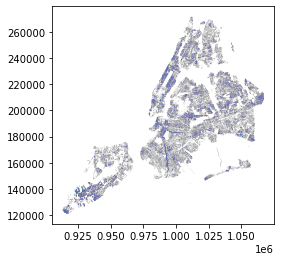

In [44]:
nyc_trees_projected['buffered_points'].plot()

In [ ]:
# calling .plot() on the buffered points is taking a long time...
# I wonder if this is a potential use case for the `.simplify()` geopandas method

In [ ]:
# now let's create a new gdf with lines created from these points
# I think we need to call
# if I have a gdf with a bunch of potentially overlapping points, how can I create a new gdf/geoseries with lines that
# represent the points that do overlap.
# geospatial operation: intersect... I think.
# hm... yeah it's like I want a union... but I only want to have a union of points that intersect.

In [45]:
nyc_trees_projected.head()

,nta,health,zipcode,latitude,nta_name,state,trnk_wire,y_sp,brnch_othe,root_grate,...,root_other,created_at,borocode,block_id,trnk_light,tree_dbh,root_stone,geometry,BoroName,buffered_points
0,QN17,Fair,11375,40.72309177,Forest Hills,New York,No,202756.768749,No,No,...,No,08/27/2015,4,348711,No,3,No,POINT (1027431.148 202756.769),Queens,"POLYGON ((1027443.148 202756.769, 1027443.090 ..."
1,QN49,Fair,11357,40.79411067,Whitestone,New York,No,228644.837379,No,No,...,No,09/03/2015,4,315986,No,21,Yes,POINT (1034455.701 228644.837),Queens,"POLYGON ((1034467.701 228644.837, 1034467.643 ..."
2,QN72,Good,11105,40.78242823,Steinway,New York,No,224349.036588,No,No,...,No,09/05/2015,4,302371,No,11,No,POINT (1008850.185 224349.037),Queens,"POLYGON ((1008862.185 224349.037, 1008862.127 ..."
3,QN72,Poor,11105,40.78173511,Steinway,New York,No,224096.27397,No,No,...,No,09/05/2015,4,302371,No,8,No,POINT (1008615.374 224096.274),Queens,"POLYGON ((1008627.374 224096.274, 1008627.317 ..."
4,QN25,Fair,11373,40.73764622,Corona,New York,No,208049.712887,No,No,...,No,08/29/2015,4,342816,Yes,14,No,POINT (1021578.644 208049.713),Queens,"POLYGON ((1021590.644 208049.713, 1021590.587 ..."


In [ ]:
# this might be useful if I want to find the longest lines in each borough
# overlapping_points = gdf[gdf.dissolve(by='your_attribute_column').geometry.apply(lambda x: len(x) > 1)]

In [46]:
# since the buffered points are actually polygons, I think I want to create a gdf with MultiPolygons representing the 
# overlapping polygons
buffered_points = nyc_trees_projected['buffered_points']
overlapping_points = buffered_points[buffered_points.apply(lambda x: buffered_points.intersects(x).sum() > 1)]

KeyboardInterrupt: 

In [ ]:
# started at 9:54...
# ok this is going to be very slow I imagine... it has to do like a cross-join across the entire dataset...
# I guess this is where something like Dask comes in handy...
# how many rows are there in this dataset?
# still going at 10:13...
# stil going at 10:44 [interrupted]